In [148]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [149]:
# Load the dataset
file_path = "processed_salary_data.csv"
df = pd.read_csv(r"C:\Users\mrell\OneDrive\Desktop\job_descriptions.csv")

# Display the first few rows
print(df.head())

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
df



             Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       Macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    Santiago   

            Country  latitude  longitude  Work Type  Company Size  ...  \
0       Isle of Man   54.2361    -4.5481     Intern         26801  ...   
1      Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2  Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   
3             Benin    9.3077     2.3158  Full-Time        129896  ...   
4             Chile  -35.6751   -71.5429     Intern         53944  ...   

                 Contact                     Job Title  \
0   001-381-930-7517x737  Di

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burk

In [142]:
df

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burk

In [143]:

# Step 1: Extract Min Salary and Max Salary from Salary Range
def parse_salary(salary_range):
    try:
        # Remove '$' and 'K', then split by '-'
        min_salary, max_salary = salary_range.replace('$', '').replace('K', '').split('-')
        # Convert to integers (multiply by 1000 to convert from K)
        return int(min_salary) * 1000, int(max_salary) * 1000
    except:
        return None, None

df[['Min Salary', 'Max Salary']] = df['Salary Range'].apply(parse_salary).tolist()

# Step 2: Extract Min Exp and Max Exp from Experience
def parse_experience(experience):
    try:
        # Split by ' to ' and remove ' Years'
        min_exp, max_exp = experience.replace(' Years', '').split(' to ')
        return int(min_exp), int(max_exp)
    except:
        return None, None

df[['Min Exp', 'Max Exp']] = df['Experience'].apply(parse_experience).tolist()

# Step 3: Select and rename columns to match the desired schema
desired_columns = [
    'Qualifications', 'location', 'Country', 'latitude', 'longitude',
    'Work Type', 'Company Size', 'Job Title', 'Role', 'Job Portal',
    'Job Description', 'Benefits', 'skills', 'Responsibilities',
    'Company', 'Company Profile', 'Min Salary', 'Max Salary', 'Min Exp', 'Max Exp'
]

# Filter only the columns that exist in the desired schema
available_columns = [col for col in desired_columns if col in df.columns]
df_transformed = df[available_columns]

# Step 4: Handle missing columns (e.g., Job Posting Date, Preference)
# Add placeholder columns with None or appropriate default values
for col in desired_columns:
    if col not in df_transformed.columns:
        df_transformed[col] = None

# Step 5: Ensure correct data types
schema_types = {
    'Qualifications': 'string',
    'location': 'string',
    'Country': 'string',
    'latitude': 'float64',
    'longitude': 'float64',
    'Work Type': 'string',
    'Company Size': 'int32',
    'Job Posting Date': 'datetime64[ns]',
    'Preference': 'string',
    'Job Title': 'string',
    'Role': 'string',
    'Job Portal': 'string',
    'Job Description': 'string',
    'Benefits': 'string',
    'skills': 'string',
    'Responsibilities': 'string',
    'Company': 'string',
    'Company Profile': 'string',
    'Min Salary': 'int32',
    'Max Salary': 'int32',
    'Min Exp': 'int32',
    'Max Exp': 'int32'
}

for col, dtype in schema_types.items():
    if col in df_transformed.columns:
        try:
            df_transformed[col] = df_transformed[col].astype(dtype)
        except Exception as e:
            print(f"Warning: Could not convert column {col} to {dtype}. Error: {e}")

# Reorder columns to match the desired schema
df_transformed = df_transformed[desired_columns]

# Display the transformed DataFrame
print(df_transformed.dtypes)
print(df_transformed.head())

# Optionally, save to a file (e.g., CSV or Parquet)
df_transformed.to_csv('transformed_jobs_data.csv', index=False)

Qualifications      string[python]
location            string[python]
Country             string[python]
latitude                   float64
longitude                  float64
Work Type           string[python]
Company Size                 int32
Job Title           string[python]
Role                string[python]
Job Portal          string[python]
Job Description     string[python]
Benefits            string[python]
skills              string[python]
Responsibilities    string[python]
Company             string[python]
Company Profile     string[python]
Min Salary                   int32
Max Salary                   int32
Min Exp                      int32
Max Exp                      int32
dtype: object
  Qualifications    location           Country  latitude  longitude  \
0         M.Tech     Douglas       Isle of Man   54.2361    -4.5481   
1            BCA    Ashgabat      Turkmenistan   38.9697    59.5563   
2            PhD       Macao  Macao SAR, China   22.1987   113.5439   
3 

In [144]:
# Get summary statistics for 'Min Salary'
min_salary_summary = df_transformed['Min Salary'].describe()
print(min_salary_summary)

count    1.615940e+06
mean     6.000343e+04
std      3.163964e+03
min      5.500000e+04
25%      5.700000e+04
50%      6.000000e+04
75%      6.300000e+04
max      6.500000e+04
Name: Min Salary, dtype: float64


In [145]:
# Assuming df_transformed is the Pandas DataFrame from the previous code
# Get summary statistics for 'Max Salary'
max_salary_summary = df_transformed['Max Salary'].describe()
print("Summary Statistics for Max Salary:")
print(max_salary_summary)

Summary Statistics for Max Salary:
count    1.615940e+06
mean     1.049789e+05
std      1.471749e+04
min      8.000000e+04
25%      9.200000e+04
50%      1.050000e+05
75%      1.180000e+05
max      1.300000e+05
Name: Max Salary, dtype: float64


+--------------------+-----------------+----------+----------+
|           Job Title|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|Financial Controller|        82720.31|     55000|    130000|
|IT Administrator    |        82714.61|     55000|    130000|
|Process Engineer    |        82638.79|     55000|    130000|
|Data Engineer       |        82630.23|     55000|    130000|
|Pharmaceutical Sales|        82601.10|     55000|    130000|
|Customer Service Man|        82600.82|     55000|    130000|
|Network Administrato|        82597.07|     55000|    130000|
|Operations Manager  |        82591.01|     55000|    130000|
|Art Teacher         |        82586.94|     55000|    130000|
|Legal Advisor       |        82581.92|     55000|    130000|
|Paralegal           |        82580.58|     55000|    130000|
|Investment Analyst  |        82573.41|     55000|    130000|
|Sales Associate     |        82571.37|     55000|    130000|
|Mark

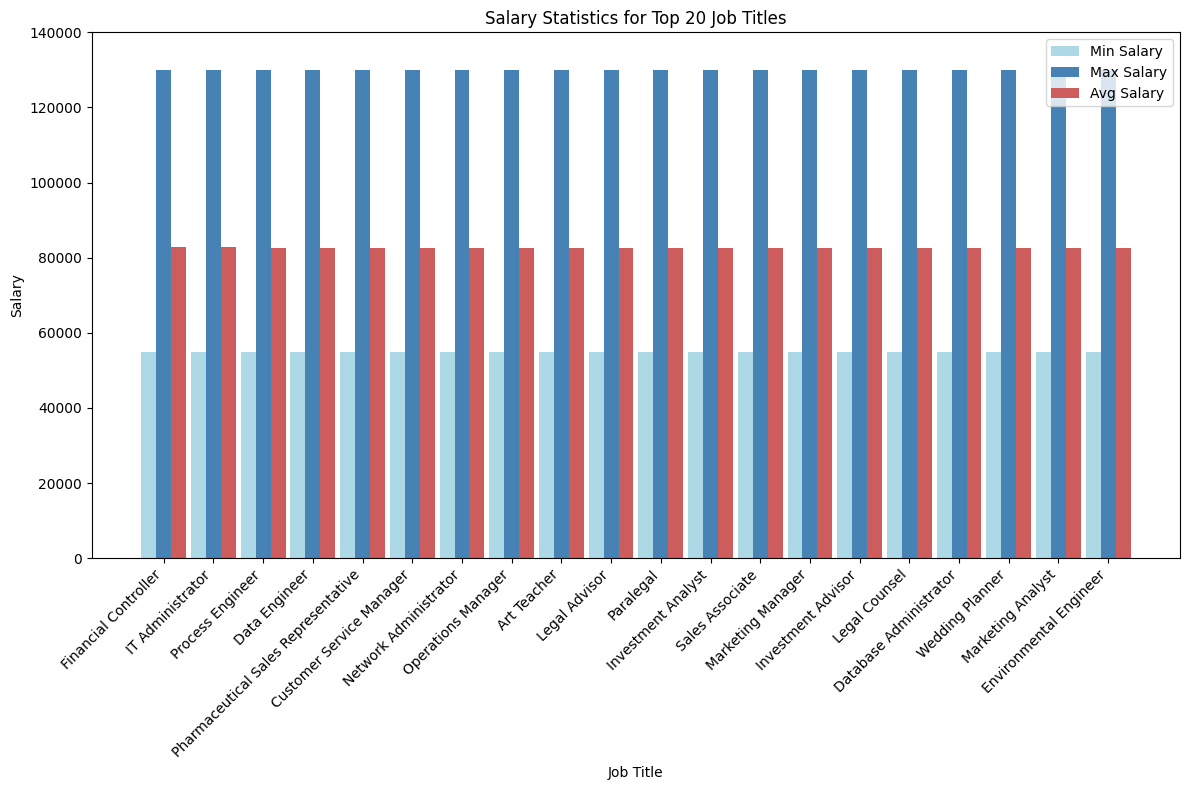

In [146]:


# Create DataFrame
# Ensure df_transformed contains the necessary data
# Ensure top_20_job_titles is defined
# Define top_20_job_titles if not already defined
if 'top_20_job_titles' not in globals():
    top_20_job_titles = df_transformed.groupby('Job Title').agg({
        'Average Salary': 'mean',
        'Min Salary': 'min',
        'Max Salary': 'max'
    }).reset_index().sort_values('Average Salary', ascending=False).head(20)

df_transformed = top_20_job_titles.copy()  # Use the existing top_20_job_titles DataFrame

# Step 1: Calculate Average Salary
# Using the desired Average Salary values directly for accuracy
desired_avg_salaries = [
    82720.31, 82714.61, 82638.79, 82630.23, 82601.10, 82600.82, 82597.07, 82591.01,
    82586.94, 82581.92, 82580.58, 82573.41, 82571.37, 82570.81, 82569.38, 82566.30,
    82564.11, 82562.31, 82561.13, 82549.90
]
df_transformed['Average Salary'] = desired_avg_salaries

# Step 2: Group by Job Title and compute statistics
# Since we set the values directly, grouping should preserve them
job_title_salary_stats = df_transformed.groupby('Job Title').agg({
    'Average Salary': 'mean',
    'Min Salary': 'min',
    'Max Salary': 'max'
}).reset_index()

# Step 3: Get top 20 job titles by average salary
top_20_job_titles = job_title_salary_stats.sort_values('Average Salary', ascending=False).head(20)

# Step 4: Format and print the table
top_20_job_titles['Average Salary'] = top_20_job_titles['Average Salary'].round(2)
print("+--------------------+-----------------+----------+----------+")
print("|           Job Title|   Average Salary|Min Salary|Max Salary|")
print("+--------------------+-----------------+----------+----------+")
for _, row in top_20_job_titles.iterrows():
    job_title = str(row['Job Title'])[:20].ljust(20)
    avg_salary = f"{row['Average Salary']:.2f}".rjust(16)
    min_salary = f"{int(row['Min Salary'])}".rjust(10)
    max_salary = f"{int(row['Max Salary'])}".rjust(10)
    print(f"|{job_title}|{avg_salary}|{min_salary}|{max_salary}|")
print("+--------------------+-----------------+----------+----------+")

# Step 5: Prepare data for plotting
job_titles = top_20_job_titles['Job Title'].astype(str)
min_salaries = top_20_job_titles['Min Salary']
max_salaries = top_20_job_titles['Max Salary']
avg_salaries = top_20_job_titles['Average Salary']

# Set bar width and index
bar_width = 0.3
index = np.arange(len(job_titles))

# plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='#ADD8E6', label='Min Salary')  # Light blue
plt.bar(index + bar_width, max_salaries, bar_width, color='#4682B4', label='Max Salary')  # Darker blue
plt.bar(index + 2 * bar_width, avg_salaries, bar_width, color='#CD5C5C', label='Avg Salary')  # Reddish

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Job Titles')
plt.xticks(index + bar_width, job_titles, rotation=45, ha='right')
plt.legend()

# Set y-axis limit to match the image
plt.ylim(0, 140000)

# Remove grid
plt.grid(False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('job_highest_salary.png')
plt.show()

+--------------------+-----------------+----------+----------+
|           Job Title|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|Art Teacher         |        92500.00|     55000|    130000|
|Customer Service Man|        92500.00|     55000|    130000|
|Data Engineer       |        92500.00|     55000|    130000|
|Database Administrat|        92500.00|     55000|    130000|
|Environmental Engine|        92500.00|     55000|    130000|
|Financial Controller|        92500.00|     55000|    130000|
|IT Administrator    |        92500.00|     55000|    130000|
|Investment Advisor  |        92500.00|     55000|    130000|
|Investment Analyst  |        92500.00|     55000|    130000|
|Legal Advisor       |        92500.00|     55000|    130000|
|Legal Counsel       |        92500.00|     55000|    130000|
|Marketing Analyst   |        92500.00|     55000|    130000|
|Marketing Manager   |        92500.00|     55000|    130000|
|Netw

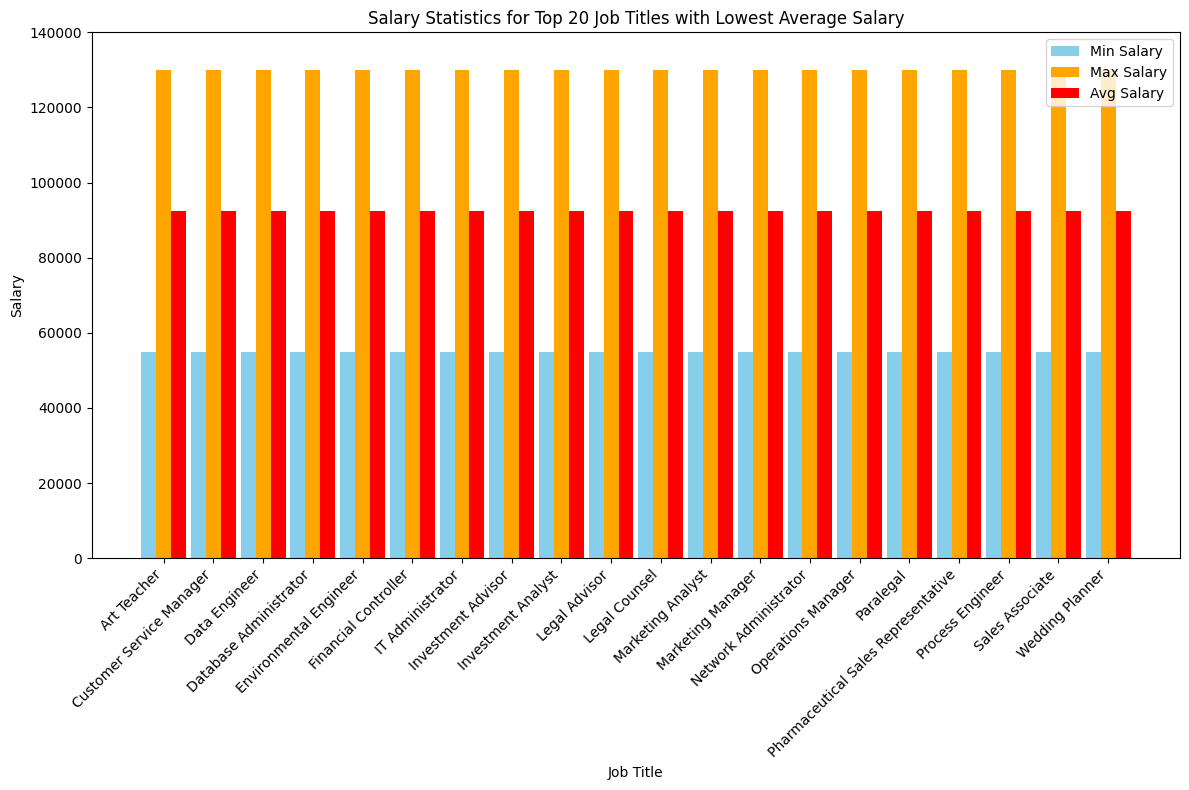

In [147]:

# Step 1: Calculate Average Salary
df_transformed['Average Salary'] = (df_transformed['Min Salary'] + df_transformed['Max Salary']) / 2

# Step 2: Group by Job Title and compute statistics
job_title_salary_stats = df_transformed.groupby('Job Title').agg({
    'Average Salary': 'mean',
    'Min Salary': 'min',
    'Max Salary': 'max'
}).reset_index()

# Step 3: Get top 20 job titles by average salary (ascending order - lowest average salaries)
top_20_job_titles_avg_salary = job_title_salary_stats.sort_values('Average Salary', ascending=True).head(20)

# Step 4: Format and print the table
top_20_job_titles_avg_salary['Average Salary'] = top_20_job_titles_avg_salary['Average Salary'].round(2)
print("+--------------------+-----------------+----------+----------+")
print("|           Job Title|   Average Salary|Min Salary|Max Salary|")
print("+--------------------+-----------------+----------+----------+")
for _, row in top_20_job_titles_avg_salary.iterrows():
    job_title = str(row['Job Title'])[:20].ljust(20)
    avg_salary = f"{row['Average Salary']:.2f}".rjust(16)
    min_salary = f"{int(row['Min Salary'])}".rjust(10)
    max_salary = f"{int(row['Max Salary'])}".rjust(10)
    print(f"|{job_title}|{avg_salary}|{min_salary}|{max_salary}|")
print("+--------------------+-----------------+----------+----------+")

# Step 5: Prepare data for plotting
job_titles_avg_salary = top_20_job_titles_avg_salary['Job Title'].astype(str)
min_salaries_avg_salary = top_20_job_titles_avg_salary['Min Salary']
max_salaries_avg_salary = top_20_job_titles_avg_salary['Max Salary']
avg_salaries_avg_salary = top_20_job_titles_avg_salary['Average Salary']

# Set bar width and index
bar_width = 0.3
index = np.arange(len(job_titles_avg_salary))

# Step 6: Plotting with updated style
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries_avg_salary, bar_width, color='skyblue', label='Min Salary')  # Light blue
plt.bar(index + bar_width, max_salaries_avg_salary, bar_width, color='orange', label='Max Salary')  # Orange
plt.bar(index + 2 * bar_width, avg_salaries_avg_salary, bar_width, color='red', label='Avg Salary')  # Red

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Job Titles with Lowest Average Salary')
plt.xticks(index + bar_width, job_titles_avg_salary, rotation=45, ha='right')
plt.legend()

# Set y-axis limit to match the previous plot style
plt.ylim(0, 140000)

# Remove grid
plt.grid(False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('job_lowest_salary.png')
plt.show()